In [1]:
import numpy as np
import matplotlib.pyplot as plt

from model import Interval, Model, Problem


- **Contexte** : On cherche à résoudre un problème de surface minimale en utilisant une méthode des éléments finis.
- **Auteur** : Guillaume FOUCAUD M1-MACS
- **Date** : 25/04/2024


In [2]:
problem = Problem(
    exact = np.arccosh,
    interval = Interval(1.1, 2),
    max_iter = 2000,
    tolerance = 1e-8
)

problem

Problem(
    exact = <ufunc 'arccosh'>,  # exact solution
    interval = [1.1, 2],  # interval to build on
    alpha, beta = (0.4435682543851153, 1.3169578969248166),  # edge conditions
    model = Model(
    precision = 128,  # number of steps to build the mesh
    rho = 0.5,  # constant step of gradient method
    interval = [1.1, 2],  # interval to build on
    hasMesh = True,  # is mesh set ?
    exact = <ufunc 'arccosh'>  # exact solution (if set)
),  # model to approximate functions with a gradient and a finite elements method
    hasOmega = False,  # is omega set ?
    max_iter = 2000,  # number of iterations the model can perform until it stops
    tolerance = 1e-08  # error that we tolerate to stop the model and consider that we have convergence
)

**Visualisation de l'ensemble Omega**

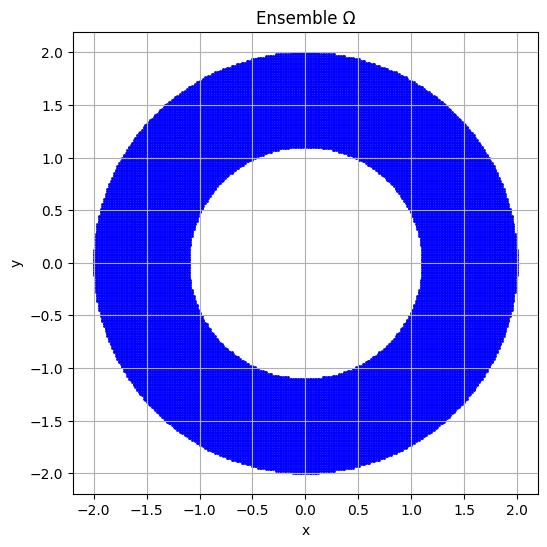

In [3]:
problem.setOmegaMesh( points = 512 )
problem.showOmega()

**Visualisation de la surface sur Omega avec $u$ la solution exacte**

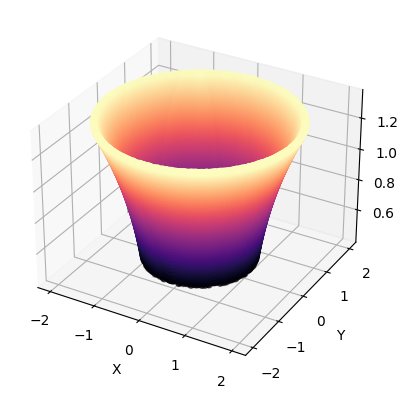

In [4]:
exactSurface = problem.getSurfaceFunctionWith(problem.exact)

problem.plotSurface(
    function = exactSurface
)

**Affichage de la fonctionnelle approximée avec la méthode de gradient et une méthode d'éléments finis**

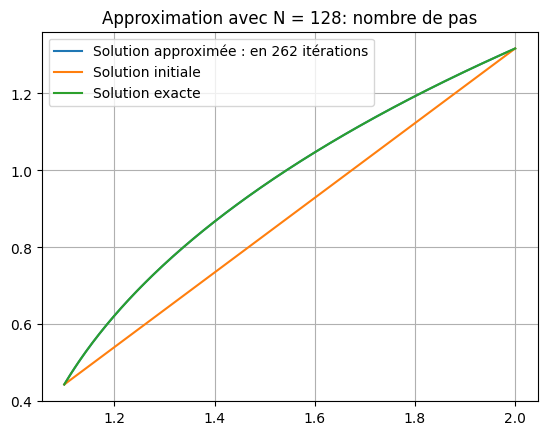

In [5]:
# approximation avec un pas N = 128
problem.plotApprox(128)

**Affichage des erreurs $L^1[a, b]$, $L^\infty[a, b]$, $W^{1,1}[a, b]$**

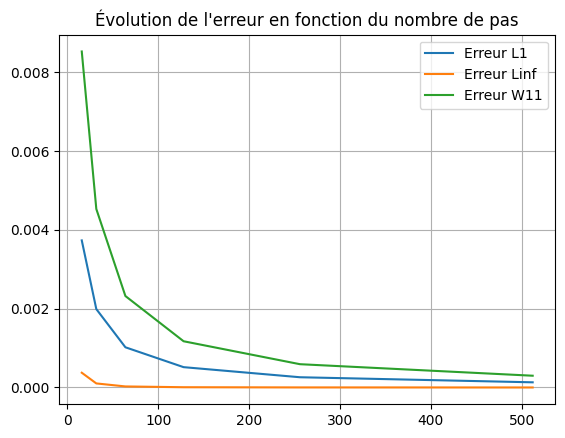

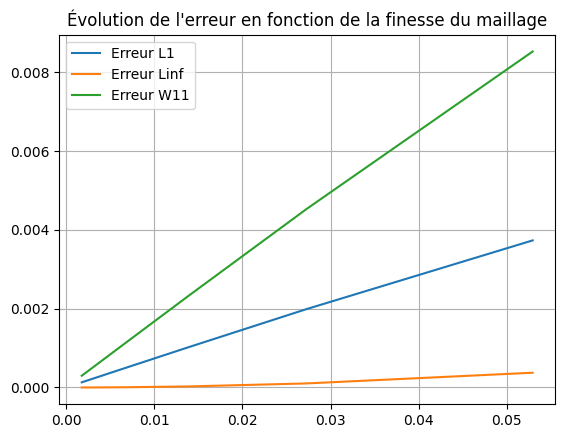

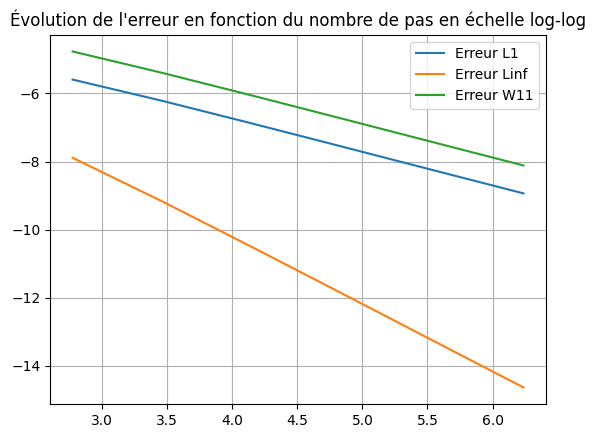

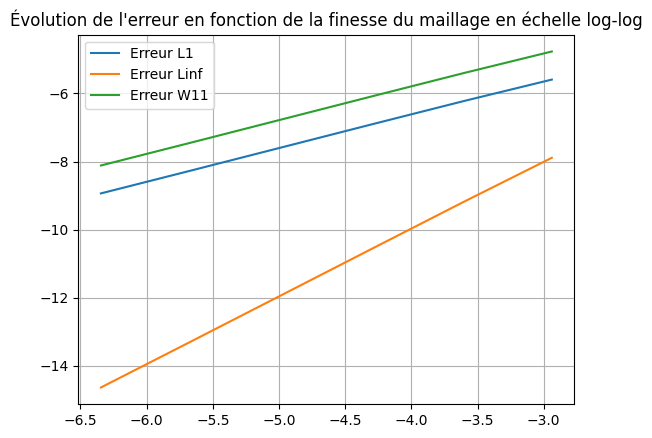

Pente de l'erreur L1:   0.9862943239012876
Pente de l'erreur Lmax: 1.9856410345335198
Pente de l'erreur W11:  0.9873503213327378


In [6]:
problem.plotErrors()

**Affichage de la surface minimale approximée**

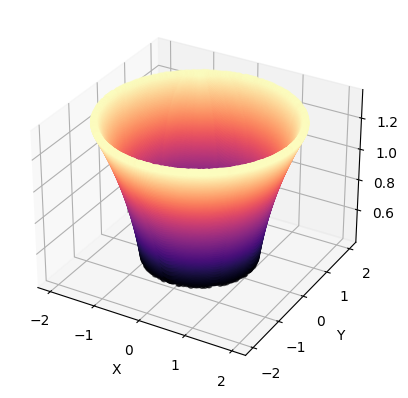

In [7]:
# Pour changer le nombre de pas du modèle (N), la méthode se charge d'actualiser le maillage et les paramètres qui en dépendent.
problem.model.update(128)

# Pour changer le nombre de points qui définissent l'ensemble Omega. (indépendant du modèle)
#problem.setOmegaMesh(points = 32)

approximation = problem.getInterpolatedFunction()
exactSurface = problem.getSurfaceFunctionWith(approximation)

problem.plotSurface(
    function = exactSurface
)